<a href="https://colab.research.google.com/github/shreyassarda7/Alpha_Research/blob/main/Double_SMA_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses a double Simple Moving Averages to provide buying and selling signals
# Need to upload data downloaded from yahooFinance

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Upload the data as .csv file downloaded from yahoon dinance
# Only use Yahoo Finance. It has a column named 'Close' and it has been used here/
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving AEGISCHEM.csv to AEGISCHEM.csv
{'AEGISCHEM.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-06-06,115.400002,121.250000,115.300003,116.699997,113.686813,827306\n2016-06-07,118.000000,122.250000,117.099998,121.500000,118.362869,795963\n2016-06-08,122.000000,126.900002,121.099998,123.849998,120.652184,1474164\n2016-06-09,124.150002,125.900002,120.349998,123.949997,120.749596,650995\n2016-06-10,125.400002,129.800003,125.400002,129.000000,125.669220,1627199\n2016-06-13,127.800003,130.000000,126.000000,127.500000,124.207947,617156\n2016-06-14,129.000000,131.149994,114.000000,121.199997,118.070618,1146307\n2016-06-15,123.099998,128.399994,119.000000,123.699997,120.506065,3750821\n2016-06-16,123.699997,124.800003,118.050003,121.250000,118.119339,518945\n2016-06-17,121.599998,123.300003,119.099998,120.050003,116.950317,350735\n2016-06-20,119.000000,121.699997,116.050003,120.699997,117.583527,338061\n2016-06-21,121.099998,123.500000,120.500000,122.050003,118.898666,468577\n2016-06

In [ ]:
name = input("What's underlying's name?")
duration = input("What is duration of analysis? (Please enter as a string)")
# Store the data
underlying = pd.read_csv('SBIN.csv')
underlying.dropna(axis = 0, how = 'any', inplace = True)
underlying.reset_index(drop=True, inplace=True)
# Show the data
underlying

What's underlying's name?SBI
What is duration of analysis? (Please enter as a string)Last 5 years


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,197.449997,202.600006,197.100006,198.899994,195.314117,23623536.0
1,2016-06-07,200.449997,211.149994,200.149994,210.149994,206.361298,66063192.0
2,2016-06-08,210.149994,211.899994,207.550003,210.699997,206.901398,35163093.0
3,2016-06-09,210.000000,212.800003,208.300003,209.949997,206.164902,27858182.0
4,2016-06-10,209.350006,211.500000,205.300003,205.949997,202.237015,25598224.0
...,...,...,...,...,...,...,...
1227,2021-05-31,421.000000,426.000000,418.000000,424.350006,420.468018,38291043.0
1228,2021-06-01,426.049988,435.350006,425.600006,432.549988,428.592987,59299647.0
1229,2021-06-02,430.799988,437.950012,429.149994,437.250000,433.250000,38657806.0
1230,2021-06-03,437.000000,441.950012,433.500000,439.649994,439.649994,38909199.0


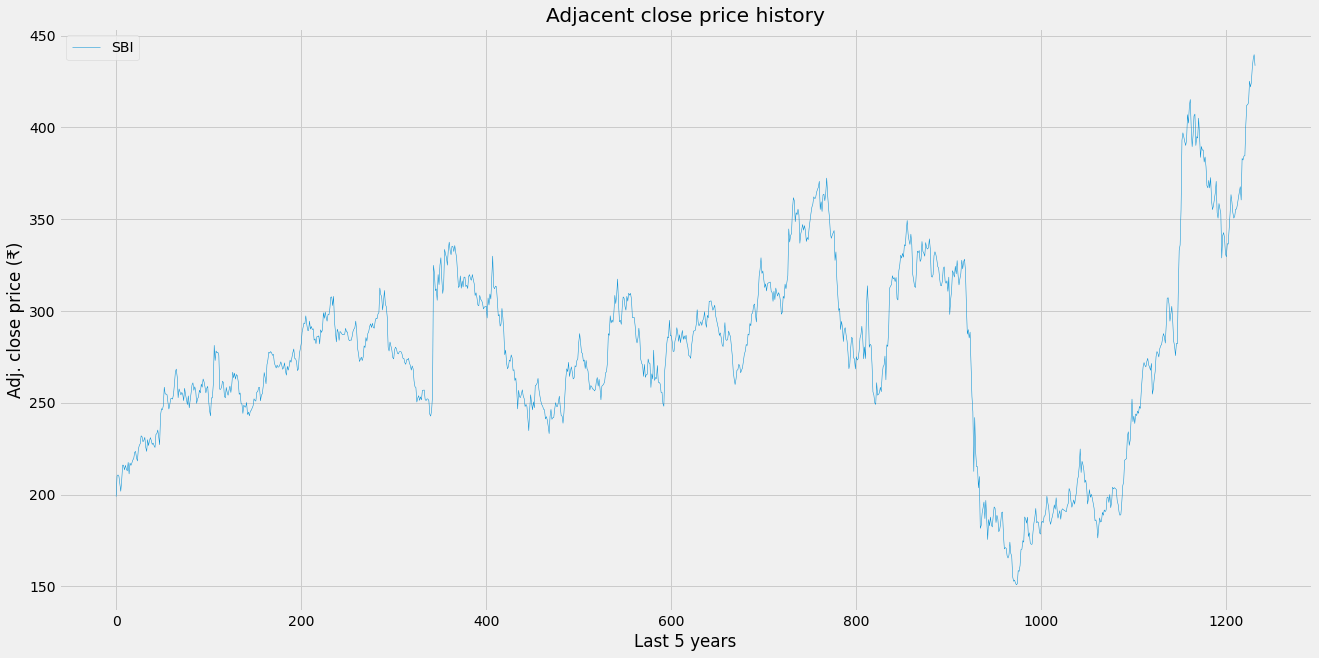

In [ ]:
# Visualize data
plt.figure(figsize=(20, 10))
plt.plot(underlying['Close'], label = name, linewidth = 0.5)
plt.title('Adjacent close price history')
plt.xlabel(duration)
plt.ylabel('Adj. close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Create SMA Indiacator
SMA20 = pd.DataFrame()
SMA20['Price'] = underlying['Close'].rolling(window = 20).mean()
SMA50 = pd.DataFrame()
SMA50['Price'] = underlying['Close'].rolling(window = 50).mean()

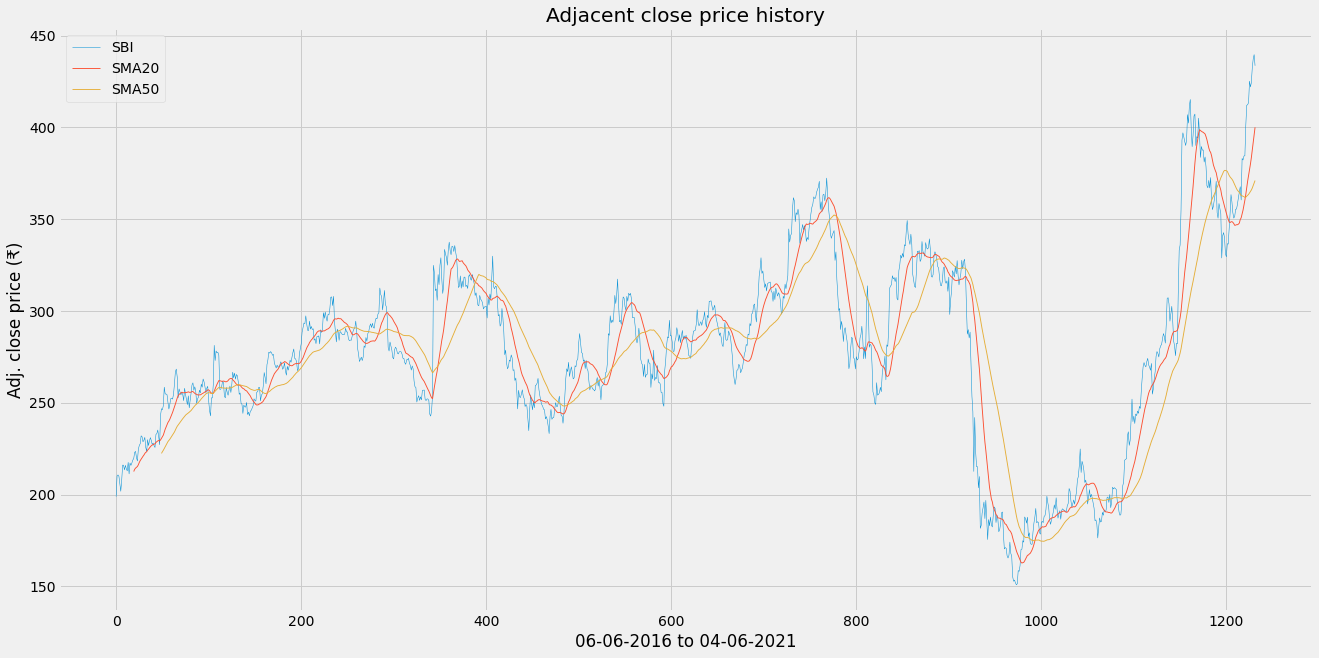

In [ ]:
# Visualize Data
plt.figure(figsize=(20, 10))
plt.plot(underlying['Close'], label = name, linewidth = 0.5)
plt.plot(SMA20['Price'], label = 'SMA20', linewidth = 0.9)
plt.plot(SMA50['Price'], label = 'SMA50', linewidth = 0.9)
plt.title('Adjacent close price history')
plt.xlabel('06-06-2016 to 04-06-2021')
plt.ylabel('Adj. close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Store all Data in new DataFrame
Data = pd.DataFrame()
Data['Price'] = underlying['Close']
Data['SMA20'] = SMA20['Price']
Data['SMA50'] = SMA50['Price']
Data

,Price,SMA20,SMA50
0,198.899994,NaN,NaN
1,210.149994,NaN,NaN
2,210.699997,NaN,NaN
3,209.949997,NaN,NaN
4,205.949997,NaN,NaN
...,...,...,...
1227,424.350006,383.542500,365.891999
1228,432.549988,387.639999,366.971999
1229,437.250000,391.927499,368.353999
1230,439.649994,396.139999,369.804999


In [ ]:
# Create a function to signal when to buy and when to sell
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  flag = 0  # flag = 0 means sell_flag and flag = 1 means buy_flag

  for i in range(len(data)):
    if data['SMA20'][i] > data['SMA50'][i]:
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        sell_signal.append(np.NaN)
    elif data['SMA20'][i] < data['SMA50'][i]:
      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        sell_signal.append(np.NaN)
    else:
      buy_signal.append(np.NaN)
      sell_signal.append(np.NaN)
  return buy_signal, sell_signal

In [ ]:
# Store buy and sell in Data
buy_sell = buy_sell_signal(Data)
Data['Buy_price'] = buy_sell[0]
Data['Sell_price'] = buy_sell[1]
Data

,Price,SMA20,SMA50,Buy_price,Sell_price
0,198.899994,NaN,NaN,NaN,NaN
1,210.149994,NaN,NaN,NaN,NaN
2,210.699997,NaN,NaN,NaN,NaN
3,209.949997,NaN,NaN,NaN,NaN
4,205.949997,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1227,424.350006,383.542500,365.891999,NaN,NaN
1228,432.549988,387.639999,366.971999,NaN,NaN
1229,437.250000,391.927499,368.353999,NaN,NaN
1230,439.649994,396.139999,369.804999,NaN,NaN


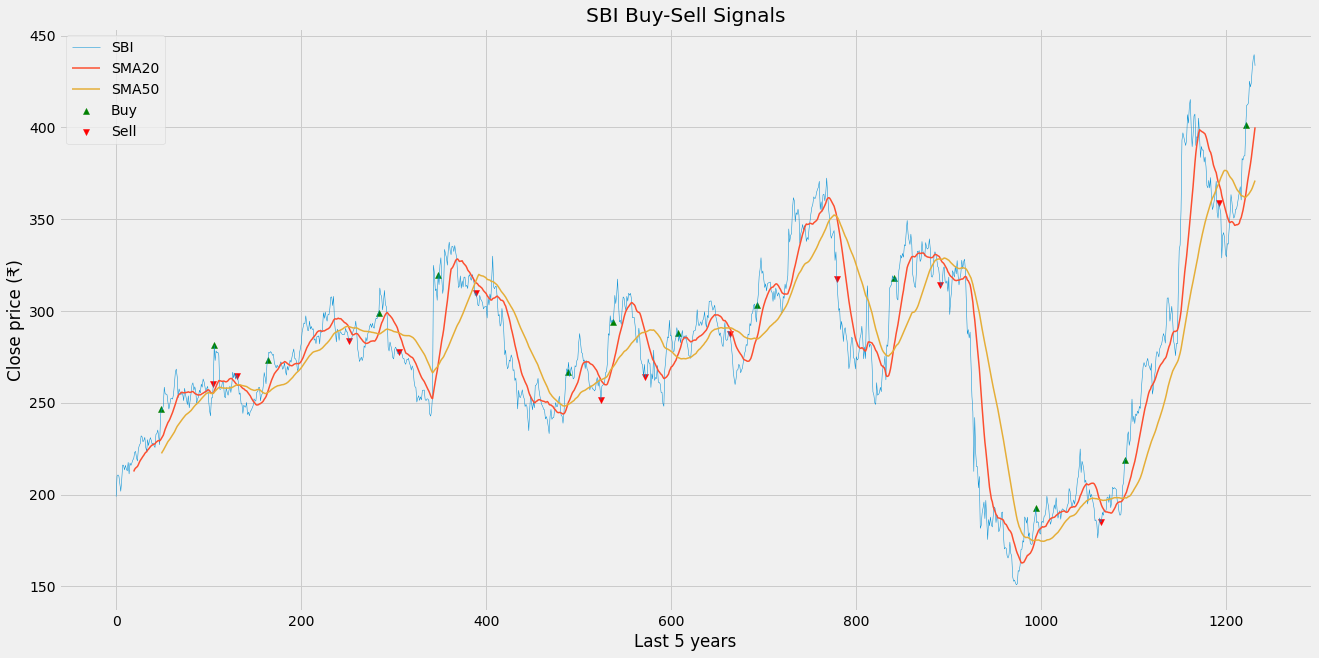

In [ ]:
# Visualize Data and strategy to buy and sell NIFTY
plt.figure(figsize = (20, 10))
plt.plot(Data['Price'], label = str(name), linewidth = 0.5)
plt.plot(Data['SMA20'], label = 'SMA20', linewidth = 1.5)
plt.plot(Data['SMA50'], label = 'SMA50', linewidth = 1.5)
plt.scatter(Data.index, Data['Buy_price'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['Sell_price'], label= 'Sell', marker = 'v', color = 'r')
plt.title(str(name) + ' Buy-Sell Signals')
plt.xlabel(duration)
plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Check results
buy = pd.Series(buy_sell[0])
sell = pd.Series(buy_sell[1])
buy.dropna
sell.dropna
current_price = underlying.iloc[-1, 4]
current_returns = (sell.sum() - buy.sum() + current_price) * 100 / buy.sum()
print('₹ 1 Lac invested using this strategy for 5 years would have become ₹', str(int(100000 * current_returns)))

₹ 1 Lac invested using this strategy for 5 years would have become ₹ 281374
